#### Regression Assumption
- multicollinearity -> VIF (rule of thumb - not greater than 10, no issues)
- homoscedsticity -> check by BP test (otherwise correct by HC3)
- linearity ** -> no test
- normality of errors **
- independence of errors ** -> qqplot.. but there is no rule

## 0. Data

In [1]:
import pandas as pd

In [3]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Sample.xlsx")
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


In [7]:
# Check whether there is an outlier

## 1. Outliers
- use plots to check this

In [9]:
from matplotlib import pyplot as plt

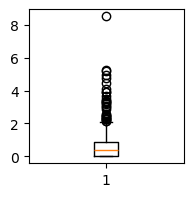

In [11]:
plt.figure(figsize=(2,2))
plt.boxplot(coupon["Sales"])
plt.show()

### 1.1 IQR (Inter-Qunartile Range)

In [14]:
Q1 = coupon["Sales"].quantile(0.25)
Q3 = coupon["Sales"].quantile(0.75)

In [15]:
IQR = Q3 - Q1

In [16]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [17]:
coupon[(coupon["Sales"] > lower) & (coupon["Sales"] < upper)]

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.920
1,2,0,41,1,0,0,0,0,0,0,0.000
2,3,0,30,2,0,3,0,0,0,1,1.540
3,4,0,28,2,0,2,0,0,0,2,0.880
4,5,1,24,2,1,5,0,0,0,2,0.530
...,...,...,...,...,...,...,...,...,...,...,...
494,496,0,18,2,1,1,1,1,0,1,0.145
495,497,1,30,2,0,3,0,0,0,1,0.390
496,498,0,27,1,0,0,0,0,1,0,0.000
497,499,0,26,2,0,1,0,0,0,1,0.740


In [20]:
coupon2 = coupon[(coupon["Sales"] > lower) & (coupon["Sales"] < upper)]
coupon2.head

<bound method NDFrame.head of      CID  Gender  Age  CClass  Discount  Visits  Email  SMS  MStatus  \
0      1       0   41       2         0       1      0    1        1   
1      2       0   41       1         0       0      0    0        0   
2      3       0   30       2         0       3      0    0        0   
3      4       0   28       2         0       2      0    0        0   
4      5       1   24       2         1       5      0    0        0   
..   ...     ...  ...     ...       ...     ...    ...  ...      ...   
494  496       0   18       2         1       1      1    1        0   
495  497       1   30       2         0       3      0    0        0   
496  498       0   27       1         0       0      0    0        1   
497  499       0   26       2         0       1      0    0        0   
498  500       0   44       2         0       1      0    0        1   

     Purchases  Sales  
0            1  0.920  
1            0  0.000  
2            1  1.540  
3        

In [18]:
coupon.shape

(499, 11)

In [21]:
coupon2.shape

(469, 11)

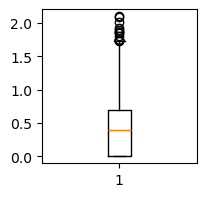

In [23]:
plt.figure(figsize=(2,2))
plt.boxplot(coupon2["Sales"])
plt.show()

In [25]:
# able to see the distribution more clearly
# explore using boxplot - there is a chance that there is outliers, use IQR and remove it

## 2. Normality

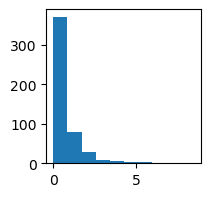

In [26]:
plt.figure(figsize=(2,2))
plt.hist(coupon["Sales"])
plt.show()

In [27]:
# This does not look like normal distribution -> to run linear regression, make sure the Sale has normal dist
# Cannot use Sales as a dependent variable
# Transform it

## 2.1 Log transformation

In [28]:
import numpy as np

In [33]:
log_sales = np.log(coupon["Sales"]+1)

In [34]:
# cannot just log transform bc it might be infinite..?
# some of the sales are zero

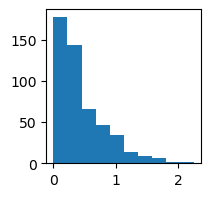

In [35]:
plt.figure(figsize=(2,2))
plt.hist(log_sales)
plt.show()

In [36]:
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


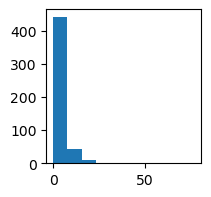

In [37]:
plt.figure(figsize=(2,2))
plt.hist(coupon["Visits"])
plt.show()

In [38]:
# skewed -> cannot use this as a dependent variable -> log transform

In [39]:
log_visits = np.log(coupon["Visits"] + 1)

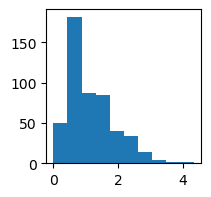

In [40]:
plt.figure(figsize=(2,2))
plt.hist(log_visits)
plt.show()

In [41]:
# after know what y is..
# y has no outlier / normally distributed
# then we can run regression
# check multicoll, homoscedisticity...

In [42]:
# From the name -> guess that this is finding linear relationship
# by definition -> that is what linearity is.
# if it is not linear, can we still use this? - yes, maybe

In [43]:
# We can add the square terms -> we are going to get not linear curve (covex or concave)
# still use linear regression by using square terms - in terms of linear regression